# 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import tensorflow as tf
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 2. Create train_data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#train data creator

ID=[]
label=[]
# import required module
import os
# assign directory
# directory = './drive/MyDrive/animal-speech-classification-project/input/audio-cats-and-dogs/cats_dogs/train/'
directory = './drive/MyDrive/animal-speech-classification-project/input/audio-cats-and-dogs/cats_dogs/train/'

# iterate over files in
# that directory

for folder in os.listdir(directory):                               #go into the directory
    for filename in os.listdir(directory+str(folder)):          #go in every class
        f = os.path.join(directory+str(folder), filename)    #scan through every file in that class
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

In [4]:
train_data=pd.DataFrame()
train_data['ID']=ID
train_data['label']=label

In [5]:
train_data

,ID,label
0,cat_124.wav,cat
1,cat_123.wav,cat
2,cat_113.wav,cat
3,cat_121.wav,cat
4,cat_1.wav,cat
...,...,...
205,dog_barking_93.wav,dog
206,dog_barking_81.wav,dog
207,dog_barking_55.wav,dog
208,dog_barking_95.wav,dog


/tmp/ipython-input-1276026547.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + 'dogs: ' + str(train_data.label.value_counts()[1])
/tmp/ipython-input-1276026547.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + '\n cats: ' + str(train_data.label.value_counts()[0])


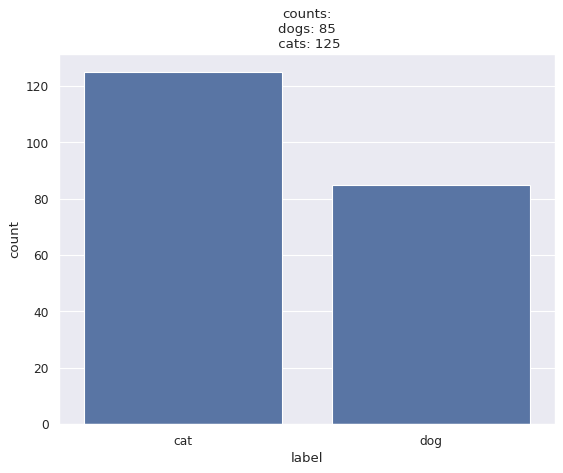

In [6]:
# plt.figure(figsize=(8,6),dpi=80)
# sns.set_theme(style="darkgrid")
# sns.countplot('label',data=train_data)
# plt.title('counts: \n' +'dogs:'+str(train_data.label.value_counts()[1])+
#           '\n cats:'+str(train_data.label.value_counts()[0]))

plt.figure(figsize=(8,6), dpi=80)
sns.set_theme(style="darkgrid")

sns.countplot(x='label', data=train_data)

plt.title(
    'counts:\n'
    + 'dogs: ' + str(train_data.label.value_counts()[1])
    + '\n cats: ' + str(train_data.label.value_counts()[0])
)

plt.show()

# 3. Create test_data

In [7]:
ID=[]
label=[]
# import required module
import os
# assign directory
# directory = './drive/MyDrive/animal-speech-classification-project/input/audio-cats-and-dogs/cats_dogs/test/'
directory = './drive/MyDrive/animal-speech-classification-project/input/audio-cats-and-dogs/cats_dogs/test/'

# iterate over files in
# that directory

for folder in os.listdir(directory):
    for filename in os.listdir(directory+str(folder)):
        f = os.path.join(directory+str(folder), filename)
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

## In test set it should be 'dogs' instead of 'test' folder

In [8]:
label[:10]

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

## Change the labels to 'cats'

In [9]:
for i in range(len(label)):
    if(label[i]=='test'):
        label[i]='dogs'

label[:10]

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

In [10]:
test_data=pd.DataFrame()
test_data['ID']=ID
test_data['label']=label
test_data

,ID,label
0,cat_17.wav,cats
1,cat_144.wav,cats
2,cat_110.wav,cats
3,cat_158.wav,cats
4,cat_115.wav,cats
...,...,...
62,dog_barking_54.wav,dogs
63,dog_barking_49.wav,dogs
64,dog_barking_112.wav,dogs
65,dog_barking_64.wav,dogs


# 4. Feature extraction of audio files using MFCCs

## This function will access the audio files directly from the dataset and automatically store the features for each file in train set

## In librosa.load function if we dont write sr=None, it will upsample every audio file to 22Khz which we dont want here.

## I have used 100 Mel freq cepstrum coeff. for each audio file.

In [11]:
def extract_features(directory):
    features=[]
    ID=[]
    for folder in os.listdir(directory):
        for filename in os.listdir(directory+str(folder)):
            f = os.path.join(directory+str(folder), filename)
            if os.path.isfile(f):
                x,sr=librosa.load(f, res_type='kaiser_fast',sr=None)
                #mfccs=np.mean(librosa.feature.mfcc(x,sr=sr,n_mfcc=100).T,axis=0)
                mfccs=np.mean(librosa.feature.mfcc(y=x,sr=sr,n_mfcc=100).T,axis=0)
                features.append(mfccs)
                ID.append(f.split('/')[-1])
    return [ID, features]

## call on train data set

In [12]:
ID, features_train=extract_features('./drive/MyDrive/animal-speech-classification-project/input/audio-cats-and-dogs/cats_dogs/train/')

## This step is required to check that the ID's that we obtained from extract_features function are matching with the actual ID's in train_data that we created earlier such that there's no mismatch of data rows.

In [13]:
#checking that if they are same, there should be no zero or false value

print(np.count_nonzero(train_data.ID==ID) )

#the ablove thing should be equal to the original shape of ID's in train_data

len(train_data.ID)==np.count_nonzero(train_data.ID==ID)

210


True

## call on test data

In [14]:
ID,features_test=extract_features('./drive/MyDrive/animal-speech-classification-project/input/audio-cats-and-dogs/cats_dogs/test/')

len(test_data.ID)==np.count_nonzero(test_data.ID==ID)   #matched

True

# 5. Create X_train, Y_train & X_test, Y_test

In [15]:
X_train=np.array(features_train)
X_test=np.array(features_test)

In [16]:
Y_train=train_data.label
Y_test=test_data.label

In [17]:
#label encode Y_train and Y_test

labelEncoder=LabelEncoder()

temp=labelEncoder.fit_transform(Y_train)
Y_train=temp.reshape(-1,1)

temp=labelEncoder.fit_transform(Y_test)
Y_test=temp.reshape(-1,1)

In [18]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(210, 100) (67, 100)
(210, 1) (67, 1)


## perfect now lets build the classification model

# 6. Build audio classification model

## input shape will be 100 since there are 100 mfccs for each audio file

In [19]:
model=tf.keras.Sequential()
model.add(layers.Dense(input_shape=(100,), units= 200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,801 (393.75 KB)

 Trainable params: 100,801 (393.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
hist=model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5449 - loss: 6.0419
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8123 - loss: 0.8200 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8697 - loss: 0.9291 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8323 - loss: 0.5570 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8846 - loss: 0.6062 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8928 - loss: 0.2941 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9144 - loss: 0.3743 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9382 - loss: 0.1770 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9344 - loss: 0.2233 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9951 - loss: 0.0584 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9946 - loss: 0.0336 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss

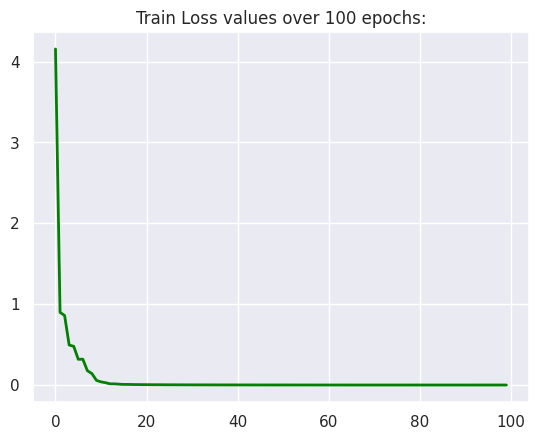

In [29]:
plt.title('Train Loss values over 100 epochs:')
plt.plot(hist.history['loss'],color='green',linewidth=2)
plt.show()

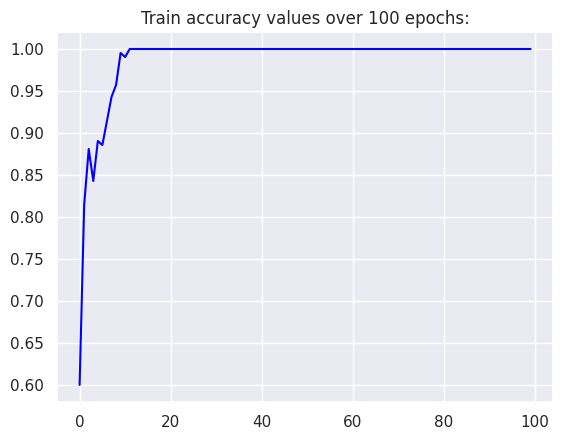

In [31]:
plt.title('Train accuracy values over 100 epochs:')
plt.plot(hist.history['accuracy'],color='blue')
plt.show()

# 7. Testing the model with test data and metrics

In [25]:
Y_pred=model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [26]:
#since we are using sigmoid activation function at the output layer
Y_pred=(Y_pred>0.5)*1

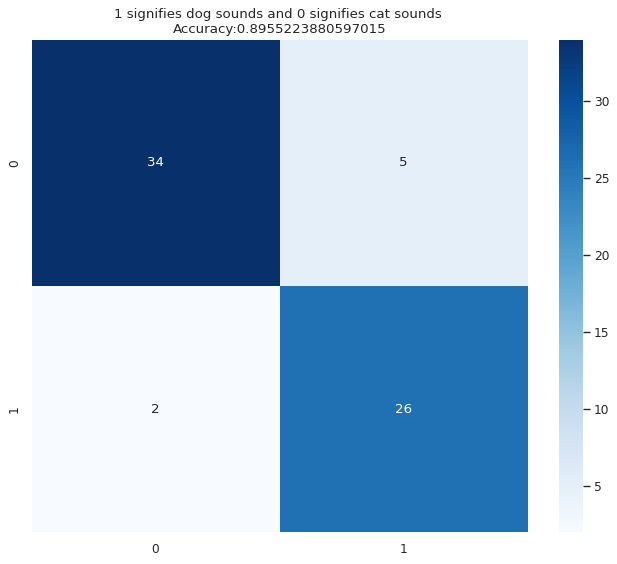

In [27]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred)))
plt.show()

## Full classification report

In [28]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.84      0.93      0.88        28

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90      0.90        67



## so we have achieved around 90% test accuracy, Not bad given that the dataset is pretty small!

# Upvote if you found this useful!